In [52]:
import numpy as np
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import seaborn as sns
import os
from tqdm import tqdm

In [53]:
ds = pydicom.dcmread('./stage_1_train_images/00a85be6-6eb0-421d-8acf-ff2dc0007e8a.dcm')

In [54]:
dataset = pd.read_csv('./stage_1_train_labels.csv')

In [55]:
ds.elements

<bound method Dataset.elements of (0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.18264.1517874409.541909
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '00a85be6-6eb0-421d-8acf-ff2dc0007e8a'
(0010, 0020) Patient ID                          LO: '00a85be6-6eb0-421d-8acf-ff2dc0007e8a'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                  

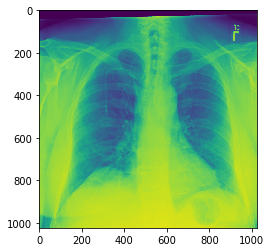

In [56]:
plt.imshow(ds.pixel_array)

In [57]:
ds.pixel_array.shape

(1024, 1024)

In [58]:
dataset.loc[dataset.patientId=='00a85be6-6eb0-421d-8acf-ff2dc0007e8a']

,patientId,x,y,width,height,Target
13,00a85be6-6eb0-421d-8acf-ff2dc0007e8a,NaN,NaN,NaN,NaN,0


In [59]:
path = './stage_1_train_images/'
files = os.listdir(path)
len(files)

25684

In [60]:
age = []
bpe = []
vpe = []
sex = []
for file in tqdm(files):
    ds = pydicom.read_file(path + file)
    age.append([ds.PatientID,ds.PatientAge])
    # bpe.append([ds.PatientID,ds.BodyPartExamined])
    vpe.append([ds.PatientID,ds.ViewPosition])
    sex.append([ds.PatientID,ds.PatientSex])

100%|████████████████████████████████████████████████████████████████████████████| 25684/25684 [08:58<00:00, 47.74it/s]


In [61]:
len(age), len(bpe), len(vpe), len(sex)

(25684, 0, 25684, 25684)

In [62]:
age = pd.DataFrame(age)
age.columns = ['patientId', 'age']
vpe = pd.DataFrame(vpe)
vpe.columns = ['patientId', 'vpe']
sex = pd.DataFrame(sex)
sex.columns = ['patientId', 'sex']

In [67]:
age['age'] = age.age.apply(int)

C:\Users\abjilani\AppData\Local\Continuum\Anaconda3\envs\dlnd-tf-lab\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


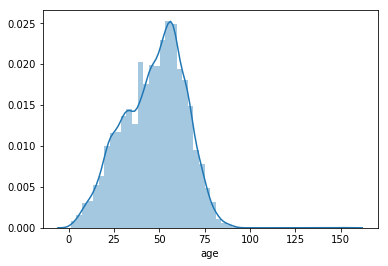

In [68]:
sns.distplot(age.age)

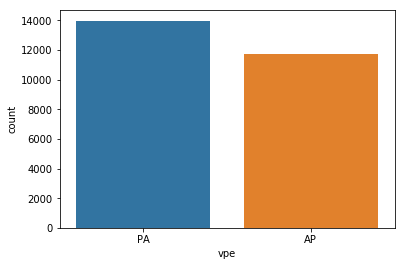

In [69]:
sns.countplot(vpe.vpe)

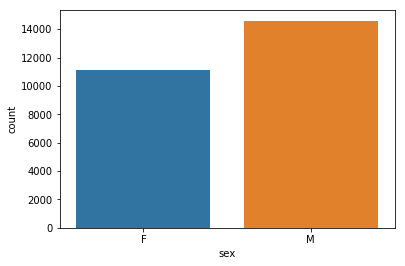

In [70]:
sns.countplot(sex.sex)

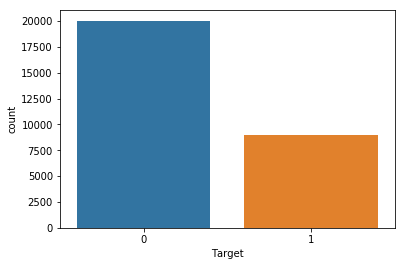

In [71]:
sns.countplot(dataset.Target)

In [73]:
dataset = dataset.merge(age, how='left', on='patientId')
dataset = dataset.merge(vpe, how='left', on='patientId')
dataset = dataset.merge(sex, how='left', on='patientId')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28989 entries, 0 to 28988
Data columns (total 9 columns):
patientId    28989 non-null object
x            8964 non-null float64
y            8964 non-null float64
width        8964 non-null float64
height       8964 non-null float64
Target       28989 non-null int64
age          28989 non-null int64
vpe          28989 non-null object
sex          28989 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 2.2+ MB


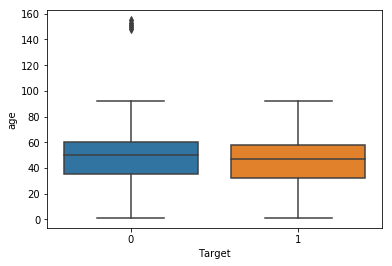

In [74]:
sns.boxplot(data = dataset, x='Target', y = 'age')

In [75]:
dataset.to_pickle('./stage_1_train_labels_ext')

In [76]:
dataset = pd.read_pickle('./stage_1_train_labels_ext')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28989 entries, 0 to 28988
Data columns (total 9 columns):
patientId    28989 non-null object
x            8964 non-null float64
y            8964 non-null float64
width        8964 non-null float64
height       8964 non-null float64
Target       28989 non-null int64
age          28989 non-null int64
vpe          28989 non-null object
sex          28989 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 2.2+ MB


In [82]:
img = Image.fromarray(ds.pixel_array)
img = img.resize((256, 256), Image.ANTIALIAS)

In [85]:
(np.array(img)).shape

(256, 256)